In [298]:
!pip install LightGBM

In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [300]:
df = pd.read_csv('MonkeyPox.csv')
print(df.shape)
df.head()

(25000, 11)


,Patient_ID,Systemic_Illness,Rectal_Pain,Sore_Throat,Penile_Oedema,Oral_Lesions,Solitary_Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,P0,NaN,False,True,True,True,False,True,False,False,Negative
1,P1,Fever,True,False,True,True,False,False,True,False,Positive
2,P2,Fever,False,True,True,False,False,False,True,False,Positive
3,P3,NaN,True,False,False,False,True,True,True,False,Positive
4,P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive


In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Patient_ID                      25000 non-null  object
 1   Systemic_Illness                18784 non-null  object
 2   Rectal_Pain                     25000 non-null  bool  
 3   Sore_Throat                     25000 non-null  bool  
 4   Penile_Oedema                   25000 non-null  bool  
 5   Oral_Lesions                    25000 non-null  bool  
 6   Solitary_Lesion                 25000 non-null  bool  
 7   Swollen Tonsils                 25000 non-null  bool  
 8   HIV Infection                   25000 non-null  bool  
 9   Sexually Transmitted Infection  25000 non-null  bool  
 10  MonkeyPox                       25000 non-null  object
dtypes: bool(8), object(3)
memory usage: 781.4+ KB


In [302]:
df.isnull().sum()

,0
Patient_ID,0
Systemic_Illness,6216
Rectal_Pain,0
Sore_Throat,0
Penile_Oedema,0
Oral_Lesions,0
Solitary_Lesion,0
Swollen Tonsils,0
HIV Infection,0
Sexually Transmitted Infection,0


In [303]:
#menghapus nilai kosong
df = df.dropna()

In [304]:
df.isna().sum()
print(df.shape)

(18784, 11)


In [305]:
df['MonkeyPox'].value_counts() # Cek distribusi nilai

,count
MonkeyPox,
Positive,12585
Negative,6199


In [306]:
df.isnull().sum()

,0
Patient_ID,0
Systemic_Illness,0
Rectal_Pain,0
Sore_Throat,0
Penile_Oedema,0
Oral_Lesions,0
Solitary_Lesion,0
Swollen Tonsils,0
HIV Infection,0
Sexually Transmitted Infection,0


In [307]:
#menghapus data duplikat
df.drop_duplicates(inplace=True)
print(df.shape)

(18784, 11)


/tmp/ipython-input-307-3130695573.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


# train test split

In [308]:
#membagi fitur
X = df.drop(['Patient_ID', 'Rectal_Pain', 'Sore_Throat', 'MonkeyPox'], axis=1)
y = df['MonkeyPox']

In [309]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18784 entries, 1 to 24999
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Systemic_Illness                18784 non-null  object
 1   Penile_Oedema                   18784 non-null  bool  
 2   Oral_Lesions                    18784 non-null  bool  
 3   Solitary_Lesion                 18784 non-null  bool  
 4   Swollen Tonsils                 18784 non-null  bool  
 5   HIV Infection                   18784 non-null  bool  
 6   Sexually Transmitted Infection  18784 non-null  bool  
dtypes: bool(6), object(1)
memory usage: 403.6+ KB


In [310]:
#get dummies
X = pd.get_dummies(X)
X.head()

,Penile_Oedema,Oral_Lesions,Solitary_Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,Systemic_Illness_Fever,Systemic_Illness_Muscle Aches and Pain,Systemic_Illness_Swollen Lymph Nodes
1,True,True,False,False,True,False,True,False,False
2,True,False,False,False,True,False,True,False,False
4,True,False,False,True,True,False,False,False,True
5,False,False,False,False,False,False,False,False,True
6,False,False,False,False,True,False,True,False,False


In [311]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18784 entries, 1 to 24999
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Penile_Oedema                           18784 non-null  bool 
 1   Oral_Lesions                            18784 non-null  bool 
 2   Solitary_Lesion                         18784 non-null  bool 
 3   Swollen Tonsils                         18784 non-null  bool 
 4   HIV Infection                           18784 non-null  bool 
 5   Sexually Transmitted Infection          18784 non-null  bool 
 6   Systemic_Illness_Fever                  18784 non-null  bool 
 7   Systemic_Illness_Muscle Aches and Pain  18784 non-null  bool 
 8   Systemic_Illness_Swollen Lymph Nodes    18784 non-null  bool 
dtypes: bool(9)
memory usage: 311.8 KB


In [312]:
X

,Penile_Oedema,Oral_Lesions,Solitary_Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,Systemic_Illness_Fever,Systemic_Illness_Muscle Aches and Pain,Systemic_Illness_Swollen Lymph Nodes
1,True,True,False,False,True,False,True,False,False
2,True,False,False,False,True,False,True,False,False
4,True,False,False,True,True,False,False,False,True
5,False,False,False,False,False,False,False,False,True
6,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
24991,False,False,True,False,True,True,True,False,False
24994,True,False,False,False,True,True,True,False,False
24996,True,False,True,True,True,True,True,False,False
24998,False,True,True,True,False,False,False,False,True


In [313]:
X = X.astype(int)

In [314]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18784 entries, 1 to 24999
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Penile_Oedema                           18784 non-null  int64
 1   Oral_Lesions                            18784 non-null  int64
 2   Solitary_Lesion                         18784 non-null  int64
 3   Swollen Tonsils                         18784 non-null  int64
 4   HIV Infection                           18784 non-null  int64
 5   Sexually Transmitted Infection          18784 non-null  int64
 6   Systemic_Illness_Fever                  18784 non-null  int64
 7   Systemic_Illness_Muscle Aches and Pain  18784 non-null  int64
 8   Systemic_Illness_Swollen Lymph Nodes    18784 non-null  int64
dtypes: int64(9)
memory usage: 1.4 MB


In [315]:
X = X.astype(int)

In [316]:
y.info()

<class 'pandas.core.series.Series'>
Index: 18784 entries, 1 to 24999
Series name: MonkeyPox
Non-Null Count  Dtype 
--------------  ----- 
18784 non-null  object
dtypes: object(1)
memory usage: 293.5+ KB


In [317]:
le = LabelEncoder()
y = le.fit_transform(y)
print(y.dtype)

int64


In [318]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15027, 9)
(3757, 9)
(15027,)
(3757,)


In [319]:
#modelling
model = LGBMClassifier()
model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10001, number of negative: 5026
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000817 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 18
[LightGBM] [Info] Number of data points in the train set: 15027, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.665535 -> initscore=0.688061
[LightGBM] [Info] Start training from score 0.688061


LGBMClassifier()

# Evaluasi

In [320]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.24      0.34      1173
           1       0.73      0.92      0.81      2584

    accuracy                           0.71      3757
   macro avg       0.65      0.58      0.57      3757
weighted avg       0.68      0.71      0.66      3757



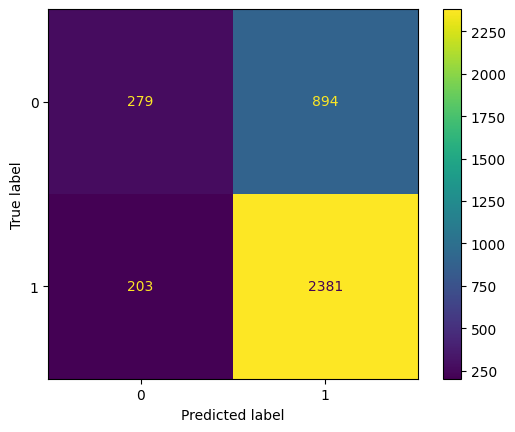

In [321]:
#visualisasi
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [322]:
#simpan model
import pickle
pickle.dump(model, open('MP.pkl', 'wb'))